In [ ]:
# Re-runnable analysis script for Pima Indians Diabetes dataset
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv("diabetes.csv")

# One-sample t-test: Glucose vs 126
glucose = df["Glucose"].dropna().values
t_one, p_one = stats.ttest_1samp(glucose, popmean=126.0)

# Welch two-sample t-test: BMI by Outcome
bmi0 = df.loc[df["Outcome"] == 0, "BMI"].dropna().values
bmi1 = df.loc[df["Outcome"] == 1, "BMI"].dropna().values
t_two, p_two = stats.ttest_ind(bmi0, bmi1, equal_var=False)

# ANOVA: Glucose across Age groups
def age_group(age):
    if age <= 30:
        return "Young (≤30)"
    elif age <= 50:
        return "Middle (31–50)"
    else:
        return "Old (>50)"
df["AgeGroup"] = df["Age"].apply(age_group)
F_anova, p_anova = stats.f_oneway(
    df.loc[df["AgeGroup"] == "Young (≤30)", "Glucose"].dropna().values,
    df.loc[df["AgeGroup"] == "Middle (31–50)", "Glucose"].dropna().values,
    df.loc[df["AgeGroup"] == "Old (>50)", "Glucose"].dropna().values,
)

# Tukey HSD post-hoc if significant
tukey = None
if p_anova < 0.05:
    tukey = pairwise_tukeyhsd(endog=df["Glucose"], groups=df["AgeGroup"], alpha=0.05)
    print(tukey)

print("One-sample t:", t_one, "p:", p_one)
print("Two-sample Welch t:", t_two, "p:", p_two)
print("ANOVA F:", F_anova, "p:", p_anova)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2   meandiff p-adj  lower    upper   reject
------------------------------------------------------------------
Middle (31–50)   Old (>50)   14.042 0.001   4.8484  23.2355   True
Middle (31–50) Young (≤30)  -11.462   0.0 -17.1307  -5.7933   True
     Old (>50) Young (≤30)  -25.504   0.0 -34.3156 -16.6923   True
------------------------------------------------------------------
One-sample t: -4.425252241769994 p: 1.1028418674613738e-05
Two-sample Welch t: -8.619316881357946 p: 6.566237624708332e-17
ANOVA F: 28.00084697750495 p: 1.836109597872047e-12


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv("diabetes.csv")

# Age groups for ANOVA/Tukey
def age_group(age):
    if age <= 30:
        return "Young (≤30)"
    elif age <= 50:
        return "Middle (31–50)"
    else:
        return "Old (>50)"
df["AgeGroup"] = df["Age"].apply(age_group)


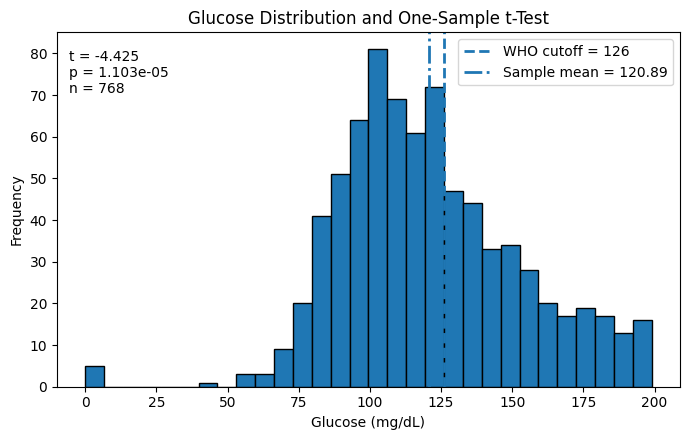

In [ ]:
WHO = 126.0
glucose = df["Glucose"].dropna().values
t_one, p_one = stats.ttest_1samp(glucose, popmean=WHO)

fig = plt.figure(figsize=(7,4.5))
plt.hist(glucose, bins=30, edgecolor="black")
plt.axvline(WHO, linewidth=2, linestyle="--", label=f"WHO cutoff = {WHO:.0f}")
plt.axvline(glucose.mean(), linewidth=2, linestyle="-.", label=f"Sample mean = {glucose.mean():.2f}")
plt.title("Glucose Distribution and One-Sample t-Test")
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Frequency")
plt.legend()
plt.text(0.02, 0.95, f"t = {t_one:.3f}\np = {p_one:.3e}\nn = {len(glucose)}",
         transform=plt.gca().transAxes, va="top")
plt.tight_layout()
plt.savefig("fig_one_sample_glucose.png", dpi=300)
plt.show()


/tmp/ipython-input-1186259550.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bmi0, bmi1], labels=["Outcome=0\n(Non-diabetic)","Outcome=1\n(Diabetic)"], showmeans=True)


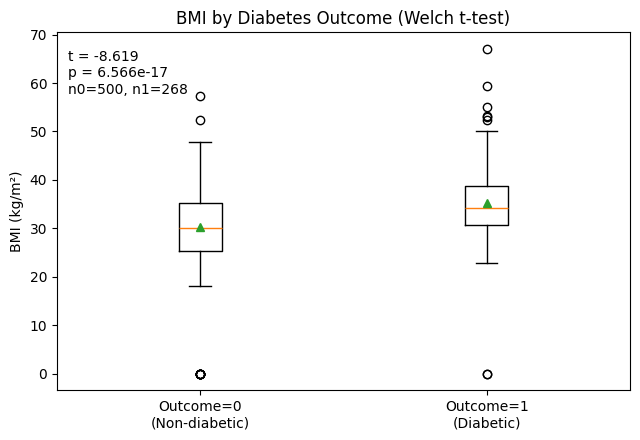

In [ ]:
bmi0 = df.loc[df["Outcome"]==0, "BMI"].dropna().values
bmi1 = df.loc[df["Outcome"]==1, "BMI"].dropna().values
t_two, p_two = stats.ttest_ind(bmi0, bmi1, equal_var=False)  # Welch

fig = plt.figure(figsize=(6.5,4.5))
plt.boxplot([bmi0, bmi1], labels=["Outcome=0\n(Non-diabetic)","Outcome=1\n(Diabetic)"], showmeans=True)
plt.title("BMI by Diabetes Outcome (Welch t-test)")
plt.ylabel("BMI (kg/m²)")
plt.text(0.02, 0.95, f"t = {t_two:.3f}\np = {p_two:.3e}\nn0={len(bmi0)}, n1={len(bmi1)}",
         transform=plt.gca().transAxes, va="top")
plt.tight_layout()
plt.savefig("fig_two_sample_bmi_outcome.png", dpi=300)
plt.show()


/tmp/ipython-input-2113786102.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g_young, g_middle, g_old], labels=["Young (≤30)","Middle (31–50)","Old (>50)"], showmeans=True)


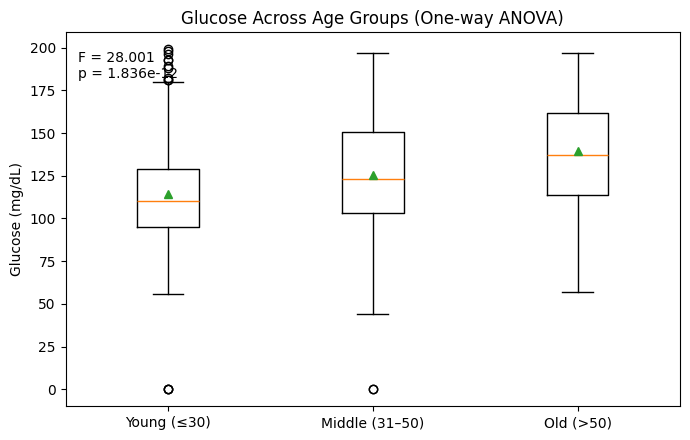

In [ ]:
g_young  = df.loc[df["AgeGroup"]=="Young (≤30)",  "Glucose"].dropna().values
g_middle = df.loc[df["AgeGroup"]=="Middle (31–50)","Glucose"].dropna().values
g_old    = df.loc[df["AgeGroup"]=="Old (>50)",     "Glucose"].dropna().values
F_anova, p_anova = stats.f_oneway(g_young, g_middle, g_old)

fig = plt.figure(figsize=(7,4.5))
plt.boxplot([g_young, g_middle, g_old], labels=["Young (≤30)","Middle (31–50)","Old (>50)"], showmeans=True)
plt.title("Glucose Across Age Groups (One-way ANOVA)")
plt.ylabel("Glucose (mg/dL)")
plt.text(0.02, 0.95, f"F = {F_anova:.3f}\np = {p_anova:.3e}",
         transform=plt.gca().transAxes, va="top")
plt.tight_layout()
plt.savefig("fig_anova_glucose_age.png", dpi=300)
plt.show()


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2   meandiff p-adj  lower    upper   reject
------------------------------------------------------------------
Middle (31–50)   Old (>50)   14.042 0.001   4.8484  23.2355   True
Middle (31–50) Young (≤30)  -11.462   0.0 -17.1307  -5.7933   True
     Old (>50) Young (≤30)  -25.504   0.0 -34.3156 -16.6923   True
------------------------------------------------------------------


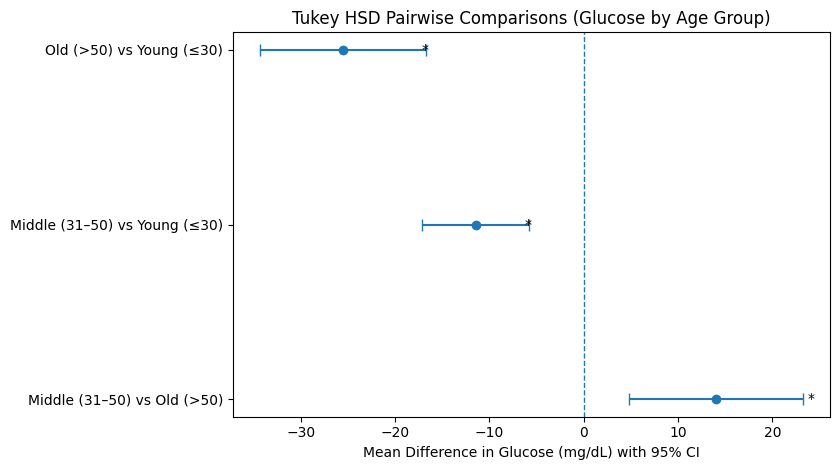

In [ ]:
# Tukey post-hoc (run only if ANOVA significant, but you can force-run to see table/plot)
tukey = pairwise_tukeyhsd(endog=df["Glucose"], groups=df["AgeGroup"], alpha=0.05)
print(tukey.summary())  # tabular output in console, same structure as your snippet

# Convert to DataFrame for plotting
tukey_tbl = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# Prepare forest plot: y = comparison label, x = meandiff, error bars from lower..upper
comp_labels = tukey_tbl.apply(lambda r: f"{r['group1']} vs {r['group2']}", axis=1)
x = tukey_tbl["meandiff"].astype(float).values
low = tukey_tbl["lower"].astype(float).values
upp = tukey_tbl["upper"].astype(float).values
ypos = np.arange(len(comp_labels))

fig = plt.figure(figsize=(8.5,4.8))
plt.errorbar(x, ypos, xerr=[x - low, upp - x], fmt="o", capsize=4)
plt.axvline(0, linestyle="--", linewidth=1)
plt.yticks(ypos, comp_labels)
plt.xlabel("Mean Difference in Glucose (mg/dL) with 95% CI")
plt.title("Tukey HSD Pairwise Comparisons (Glucose by Age Group)")
# Mark significant ones with asterisk on the right
for i, sig in enumerate(tukey_tbl["reject"].astype(bool).values):
    txt = "*" if sig else "ns"
    plt.text(upp[i] + (0.5 if upp[i] >= 0 else -0.5), i, txt, va="center")
plt.tight_layout()
plt.savefig("fig_tukey_forest_glucose_age.png", dpi=300)
plt.show()
